In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df =pd.read_excel("heart.xlsx")

In [ ]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split as tests
from sklearn.tree import DecisionTreeClassifier# for Decision Tree
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve #for confusion matrix
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.shape

(299, 13)

In [ ]:
df.DEATH_EVENT.value_counts()

,count
DEATH_EVENT,
0,203
1,96


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

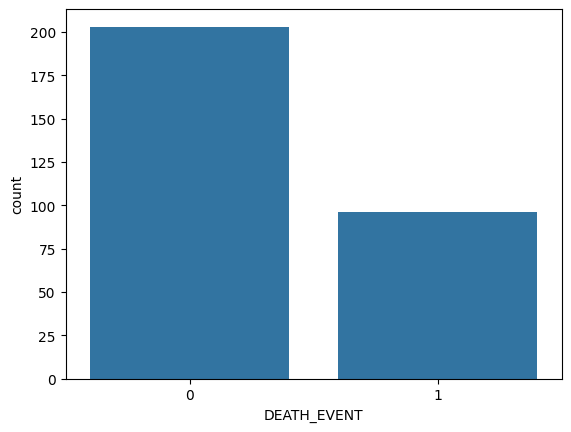

In [ ]:
sns.countplot(x='DEATH_EVENT', data=df)

<Axes: xlabel='diabetes', ylabel='count'>

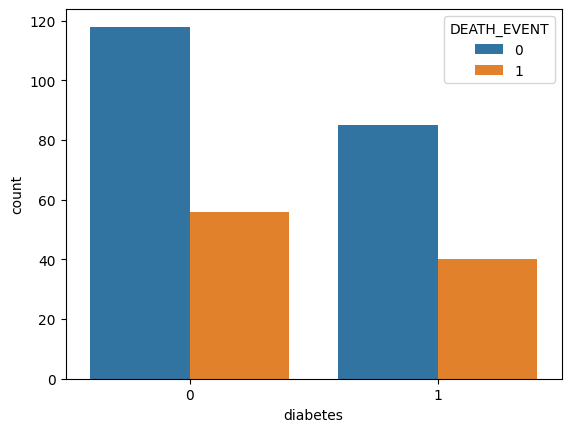

In [ ]:
sns.countplot(x ='diabetes',hue='DEATH_EVENT',data=df)

<Axes: xlabel='high_blood_pressure', ylabel='count'>

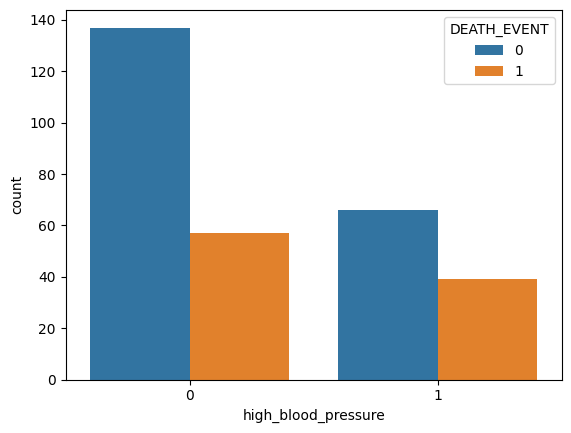

In [ ]:
sns.countplot(x ='high_blood_pressure',hue='DEATH_EVENT',data=df)

In [ ]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


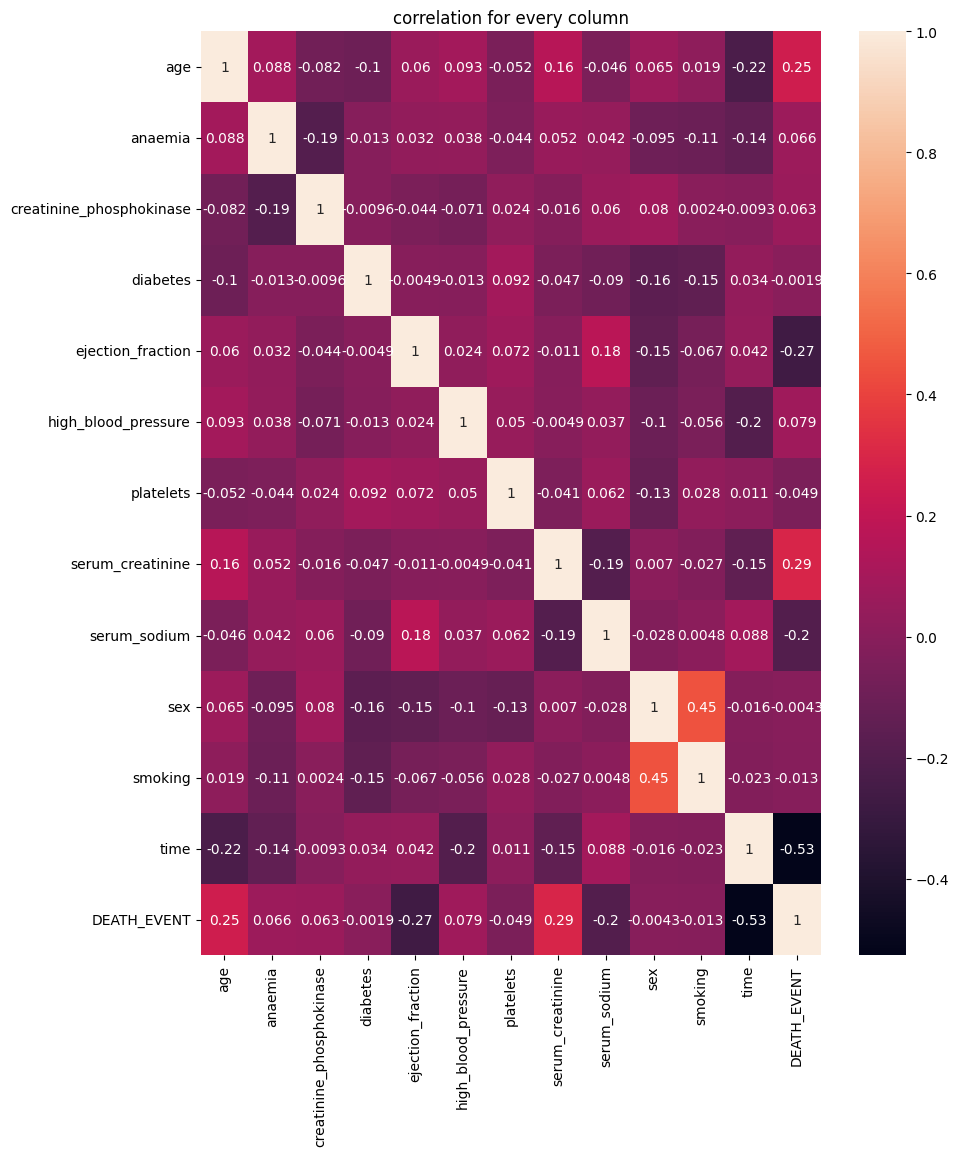

In [ ]:
plt.figure(figsize = (10,12))
plt.title("correlation for every column")
sns.heatmap(df.corr(),annot=True)
plt.savefig("heatmap.png")

**Separate x,y**

In [ ]:
x =df.drop("DEATH_EVENT",axis=1)

In [ ]:
y = df[["DEATH_EVENT"]]

In [ ]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [ ]:
y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


In [ ]:
xtrain,xtest,ytrain,ytest =tests(x,y,test_size =0.3,random_state=51)

In [ ]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
284,50.0,1,54,0,40,0,279000.0,0.8,141,1,0,250
7,60.0,1,315,1,60,0,454000.0,1.1,131,1,1,10
264,61.0,0,582,1,38,0,147000.0,1.2,141,1,0,237
223,47.0,0,582,0,25,0,130000.0,0.8,134,1,0,201
126,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100


In [ ]:
xtrain.shape

(209, 12)

In [ ]:
xtest.shape

(90, 12)

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

[Text(0.4243421052631579, 0.9444444444444444, 'x[11] <= 73.5\ngini = 0.425\nsamples = 209\nvalue = [145, 64]'),
 Text(0.19078947368421054, 0.8333333333333334, 'x[11] <= 52.0\ngini = 0.282\nsamples = 47\nvalue = [8, 39]'),
 Text(0.30756578947368424, 0.8888888888888888, 'True  '),
 Text(0.11842105263157894, 0.7222222222222222, 'x[2] <= 56.0\ngini = 0.188\nsamples = 38\nvalue = [4, 34]'),
 Text(0.05263157894736842, 0.6111111111111112, 'x[4] <= 32.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.02631578947368421, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07894736842105263, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.18421052631578946, 0.6111111111111112, 'x[2] <= 2018.0\ngini = 0.153\nsamples = 36\nvalue = [3, 33]'),
 Text(0.13157894736842105, 0.5, 'x[3] <= 0.5\ngini = 0.111\nsamples = 34\nvalue = [2, 32]'),
 Text(0.10526315789473684, 0.3888888888888889, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.15789473684210525, 0.3888888888888889, 'x[2] <= 2

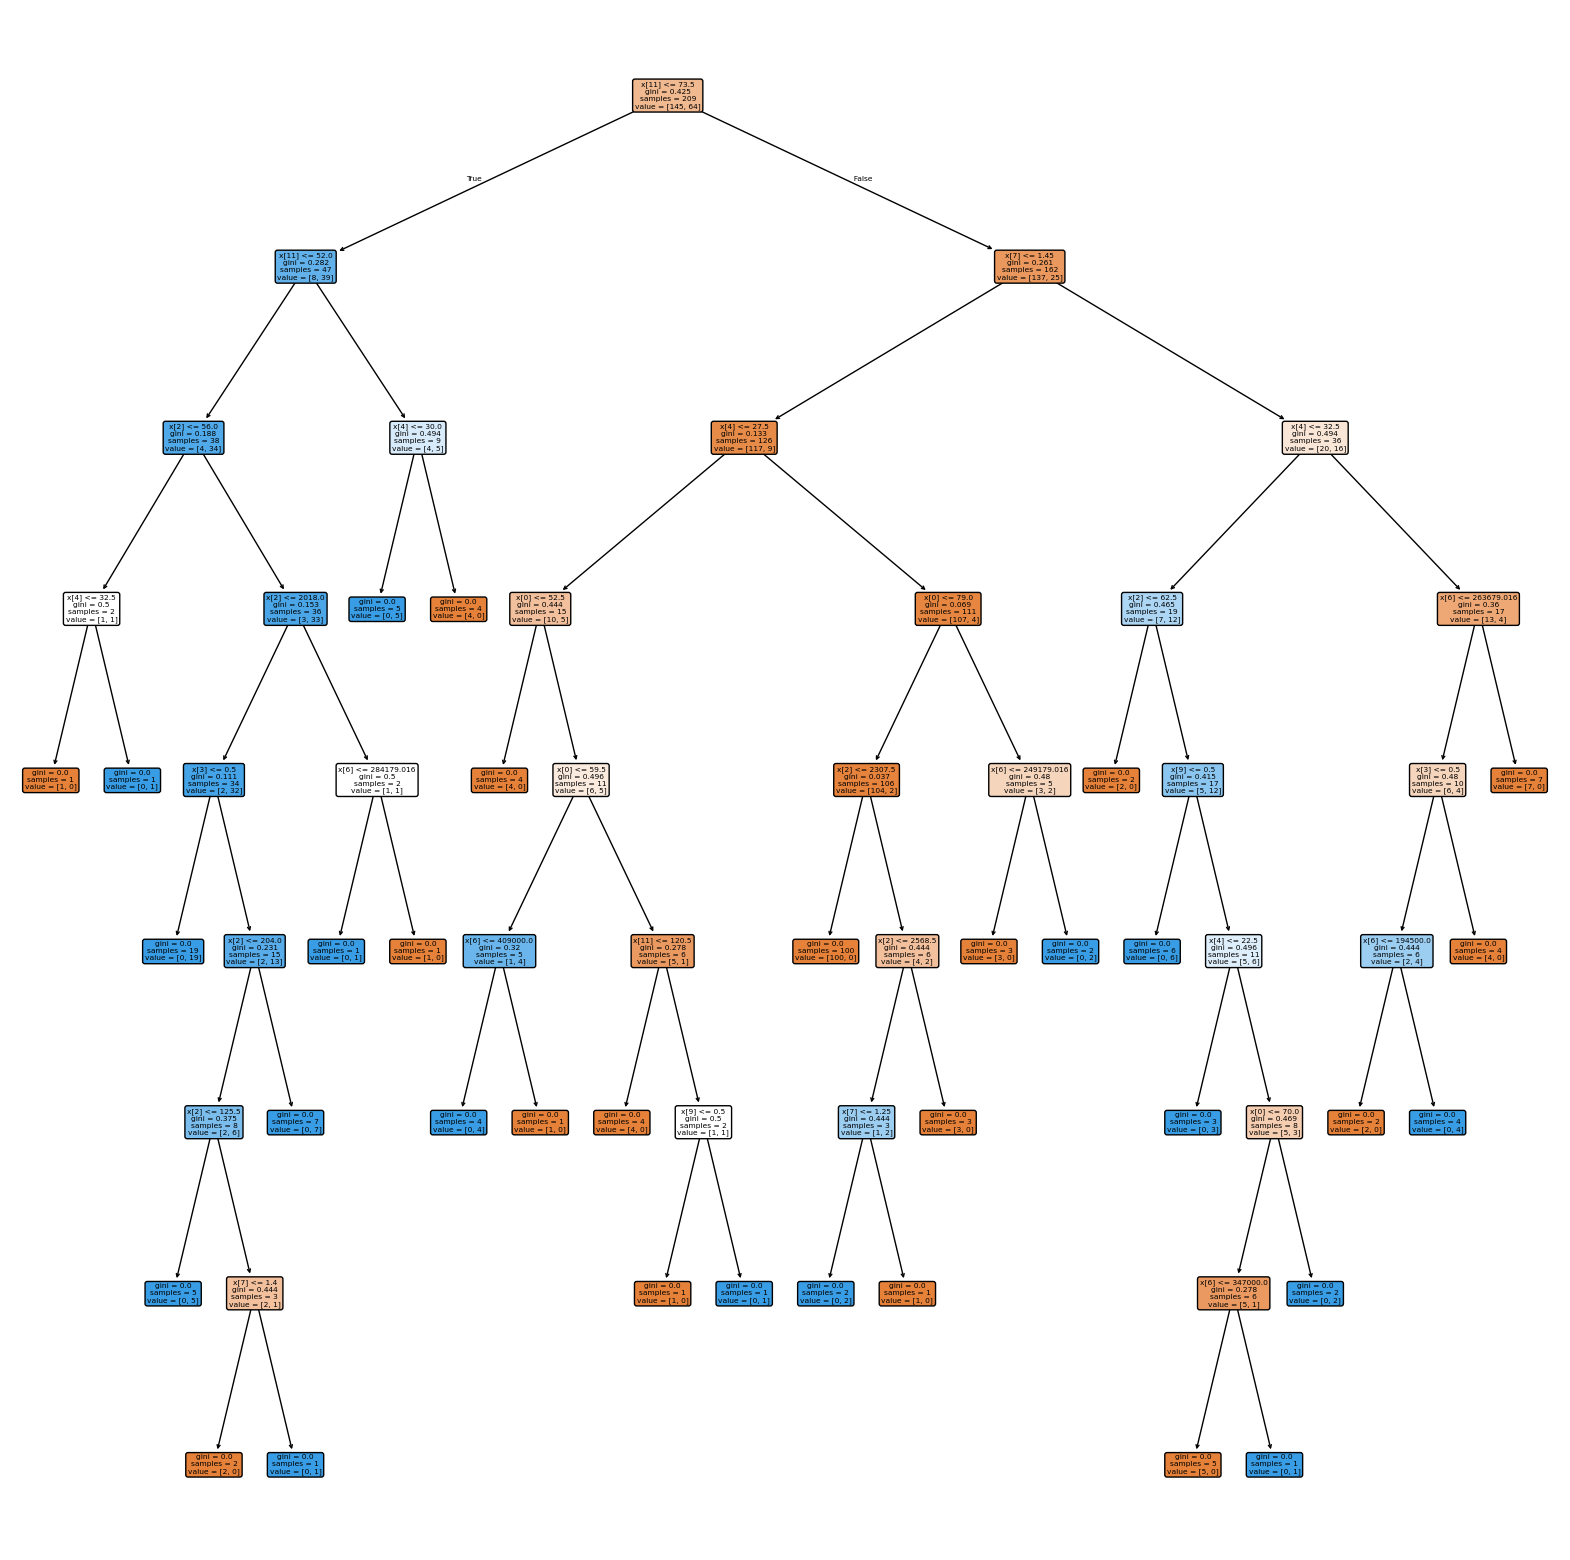

In [ ]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt,filled=True,rounded=True)

In [ ]:
plt.savefig("decisionTree.png",dpi=1200)

<Figure size 640x480 with 0 Axes>

In [ ]:
pred = dt.predict(xtest)
pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0])

In [ ]:
np.array(ytest)

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

**Confusion Matrix**

In [ ]:
classification_report(ytest,pred)

'              precision    recall  f1-score   support\n\n           0       0.86      0.86      0.86        58\n           1       0.75      0.75      0.75        32\n\n    accuracy                           0.82        90\n   macro avg       0.81      0.81      0.81        90\nweighted avg       0.82      0.82      0.82        90\n'

In [ ]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        58
           1       0.75      0.75      0.75        32

    accuracy                           0.82        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.82      0.82      0.82        90



In [ ]:
cm = confusion_matrix(ytest,pred)#[[tp,fn][fp,tn]]
cm

array([[50,  8],
       [ 8, 24]])

Text(0.5, 1.0, 'Confusion Matrix')

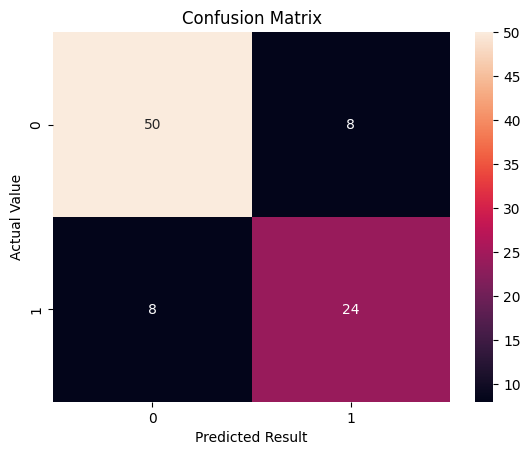

In [ ]:
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Value")
plt.title("Confusion Matrix")

In [ ]:
plt.savefig("Heatmap2.png")

<Figure size 640x480 with 0 Axes>

In [ ]:
tp,fn,fp,tn = confusion_matrix(ytest,pred).reshape(-1)

In [ ]:
tp

np.int64(50)

In [ ]:
fn

np.int64(8)

In [ ]:
accuracy=(tp+tn)/(tp+tn+fp+fn)

In [ ]:
precision = tp/(tp+fp)
precision

np.float64(0.8620689655172413)

In [ ]:
from sklearn.metrics import RocCurveDisplay as pc

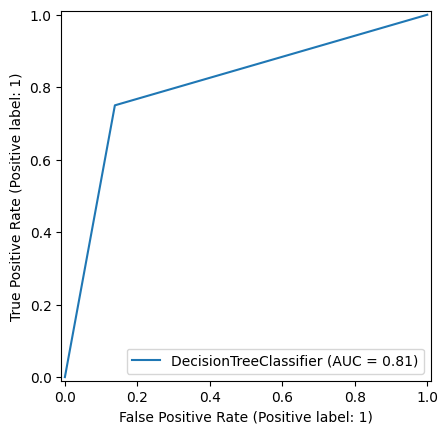

In [ ]:
pc.from_estimator(dt, xtest, ytest)

In [ ]:
dt.score(xtest, ytest)

0.8222222222222222

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=135,min_samples_split=3,max_depth= 11,max_features = 'log2',criterion= 'entropy')


In [ ]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       min_samples_split=3, n_estimators=135)

In [ ]:
rf.score(xtest,ytest)

0.8777777777777778

**Random Search CV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
tree = np.random.randint(15,150,30) #15 theke 150 er moddhe 30 ta tree generate korbe

In [ ]:
tree

array([ 84,  58, 135,  42, 100,  90,  75,  95,  26,  76,  34, 107, 110,
        16, 127,  87, 103, 144,  36,  63,  86,  73,  39,  70,  43,  81,
        67,  97,  82, 149])

In [ ]:
max_features= ['sqrt','log2']
max_depth = np.random.randint(2,12,50)

In [ ]:
max_features = ["sqrt", "log2"]
max_depth = np.random.randint(2, 12, 50)  # 50 random values between 2 and 11
criterion = ["gini", "entropy"]
min_samples_split = [2, 3, 4]

grid = {
    'n_estimators': tree,
    'criterion': criterion,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}

print(grid)

{'n_estimators': array([ 84,  58, 135,  42, 100,  90,  75,  95,  26,  76,  34, 107, 110,
        16, 127,  87, 103, 144,  36,  63,  86,  73,  39,  70,  43,  81,
        67,  97,  82, 149]), 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2'], 'max_depth': array([ 6,  7,  5,  5,  4,  5,  5,  6,  3,  2, 11,  9,  5,  3,  4, 11,  6,
        4,  4,  9, 11,  4,  3, 10,  2, 11,  6,  5, 10,  8,  3, 11,  4,  6,
        7,  3, 10,  6,  7, 10,  5,  3,  6,  5,  9,  5,  2,  4,  6,  5]), 'min_samples_split': [2, 3, 4]}


In [ ]:
print(grid)

{'n_estimators': array([ 84,  58, 135,  42, 100,  90,  75,  95,  26,  76,  34, 107, 110,
        16, 127,  87, 103, 144,  36,  63,  86,  73,  39,  70,  43,  81,
        67,  97,  82, 149]), 'criterion': ['gini', 'entropy'], 'max_feature': ['sqrt', 'log2'], 'max_depth': array([ 3,  7, 10,  2,  9,  4,  6,  4,  2,  4,  6,  9,  3, 11,  7, 11, 11,
        7,  2,  4,  2,  6,  4,  3,  5, 11,  4,  3,  5,  5,  8,  7,  4, 10,
       11, 11, 10,  8,  9,  2,  5,  4,  3,  9,  2,  6,  4,  7,  4,  3]), 'min_samples_split': [2, 3, 4]}


In [ ]:
rcv = RandomizedSearchCV(rf,grid,n_iter= 100,cv =3)

In [ ]:
rcv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    max_depth=11,
                                                    max_features='log2',
                                                    min_samples_split=3,
                                                    n_estimators=135),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 6,  7,  5,  5,  4,  5,  5,  6,  3,  2, 11,  9,  5,  3,  4, 11,  6,
        4,  4,  9, 11,  4,  3, 10,  2, 11,  6,  5, 10,  8,  3, 11,  4,  6,
        7,  3, 10,  6,  7, 10,  5,  3,  6,  5,  9,  5,  2,  4,  6,  5]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': array([ 84,  58, 135,  42, 100,  90,  75,  95,  26,  76,  34, 107, 110,
        16, 127,  87, 103, 144,  36,  63,  86,  73,  39,  70,  43,  81,
        67,  97,  82, 149])})

In [ ]:
rcv.cv_results_

{'mean_fit_time': array([0.26322651, 0.06522568, 0.11356576, 0.15235416, 0.11464135,
        0.06389507, 0.13423181, 0.05538464, 0.21715991, 0.12107309,
        0.13603568, 0.05084952, 0.21892293, 0.12517619, 0.04097899,
        0.14143109, 0.11801418, 0.21676048, 0.13713074, 0.0963126 ,
        0.21359777, 0.0276773 , 0.09968789, 0.05815784, 0.0263985 ,
        0.06554079, 0.06717912, 0.2823143 , 0.10417596, 0.14121381,
        0.33119464, 0.10834122, 0.14637558, 0.15836469, 0.13146138,
        0.11999424, 0.10972611, 0.13735104, 0.15148513, 0.1584692 ,
        0.0537746 , 0.0593311 , 0.14217075, 0.12772361, 0.05697362,
        0.03898994, 0.13835756, 0.09445906, 0.12034758, 0.14682118,
        0.05015842, 0.11462116, 0.08743572, 0.15619079, 0.1399351 ,
        0.19901196, 0.08918571, 0.21263496, 0.20018427, 0.25924794,
        0.15385667, 0.14384333, 0.34683029, 0.21504871, 0.10597865,
        0.11618447, 0.11365883, 0.05638289, 0.06481338, 0.06681617,
        0.09357707, 0.13219555,

In [ ]:
tuning_result = pd.DataFrame(rcv.cv_results_)

In [ ]:
tuning_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.263227,0.059090,0.014602,0.002699,127,4,log2,4,entropy,"{'n_estimators': 127, 'min_samples_split': 4, ...",0.871429,0.842857,0.855072,0.856453,0.011705,22
1,0.065226,0.000131,0.006933,0.000164,42,2,log2,5,entropy,"{'n_estimators': 42, 'min_samples_split': 2, '...",0.828571,0.814286,0.855072,0.832643,0.016898,82
2,0.113566,0.003916,0.011358,0.003628,76,3,sqrt,4,entropy,"{'n_estimators': 76, 'min_samples_split': 3, '...",0.885714,0.857143,0.855072,0.865977,0.013982,9
3,0.152354,0.002796,0.010550,0.000036,110,4,sqrt,3,entropy,"{'n_estimators': 110, 'min_samples_split': 4, ...",0.885714,0.828571,0.840580,0.851622,0.024600,40
4,0.114641,0.008595,0.008951,0.000669,73,3,log2,9,gini,"{'n_estimators': 73, 'min_samples_split': 3, '...",0.885714,0.885714,0.782609,0.851346,0.048604,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.139694,0.002537,0.011857,0.001773,97,4,log2,3,entropy,"{'n_estimators': 97, 'min_samples_split': 4, '...",0.842857,0.842857,0.855072,0.846929,0.005758,56
96,0.164462,0.007047,0.011034,0.000325,110,4,log2,8,entropy,"{'n_estimators': 110, 'min_samples_split': 4, ...",0.885714,0.828571,0.797101,0.837129,0.036679,81
97,0.053291,0.001512,0.006368,0.000544,36,2,log2,3,entropy,"{'n_estimators': 36, 'min_samples_split': 2, '...",0.857143,0.842857,0.855072,0.851691,0.006303,39
98,0.062263,0.000645,0.006706,0.000090,42,4,log2,6,gini,"{'n_estimators': 42, 'min_samples_split': 4, '...",0.900000,0.857143,0.826087,0.861077,0.030303,19


In [ ]:
rcv.best_score_

np.float64(0.8707384403036578)

In [ ]:
rcv.best_params_

{'n_estimators': np.int64(43),
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': np.int64(6),
 'criterion': 'entropy'}

In [ ]:
rcv2 = rcv.best_params_

In [ ]:
rcv.best_estimator_

RandomForestClassifier(max_depth=np.int64(5), max_features='log2',
                       n_estimators=np.int64(43))

In [ ]:
rcv2 = rcv.best_estimator_

In [ ]:
rcv2.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=np.int64(5), max_features='log2',
                       n_estimators=np.int64(43))

In [ ]:
rcv2.score(xtest,ytest)

0.8555555555555555